# Capstone Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#The focus are in this notebook is graphs and charts. Will talk about data visualisation and insights
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Upload the clean data obtained from step 1

In [2]:
file='Sales_data_cleaned.csv'
df = pd.read_csv(file , parse_dates = ['date'] , index_col = 'id')
df.head()

,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,capacity_in_ml
id,,,,,,,,,,,,
0.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,500.0
1.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,1500.0
2.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,330.0
3.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,500.0
4.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,330.0


In [3]:
# adding new feature per capita consumption
df['Per_capita_comsumption'] = df['quantity']/df['pop']

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

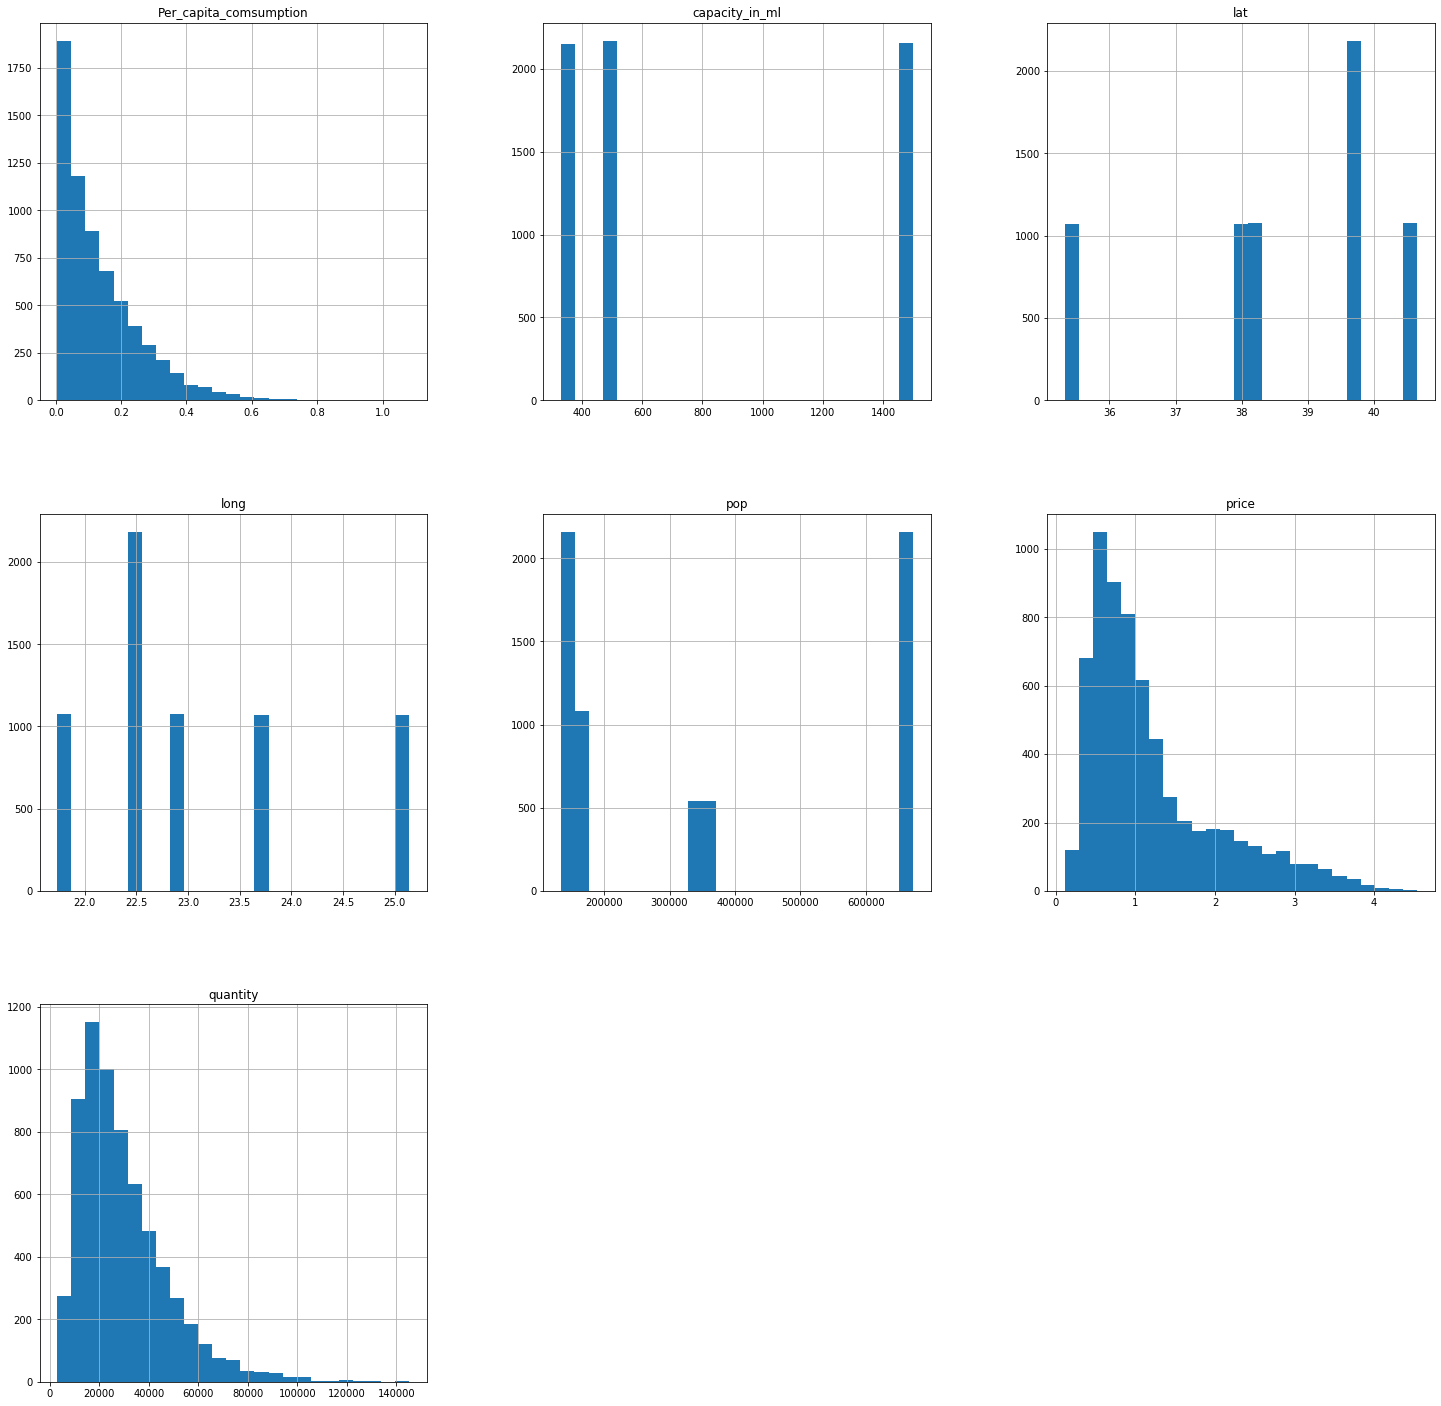

In [4]:
#What is Histogram and why to use this chart. 
#What kind of data is good to be displayed in Histogram

hist = df.hist(bins=25,figsize =(25,25))

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `city`.</font>**

**<font color='teal'>State Levels Plot</font>**

              city
Athens        2160
Larisa        1080
Irakleion     1080
Thessaloniki  1080
Patra         1080


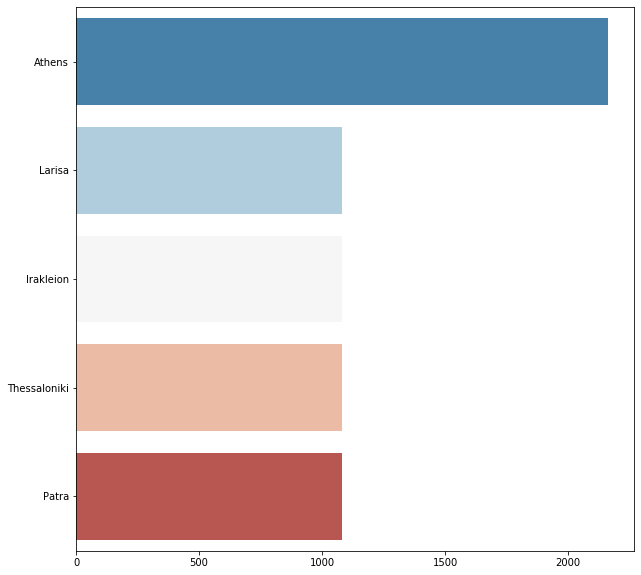

In [5]:
#Build frequency chart for histogram

f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.city.value_counts()) #Gives the frequency value at state level
print(x)
names = list(x.index)
values = list(x.city)
sns.barplot(x=values, y=names, palette="RdBu_r")

         container
glass         2170
plastic       2157
can           2153


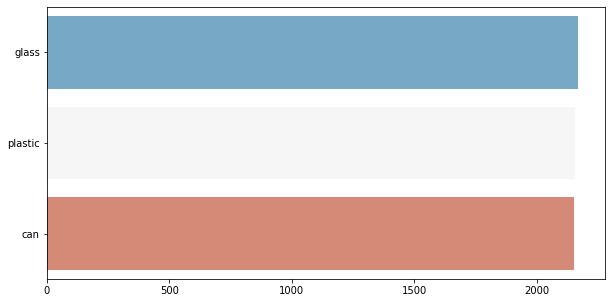

In [6]:
#Build frequency chart for histogram

f, ax = plt.subplots(figsize=(10, 5))
x = pd.DataFrame(df.container.value_counts())
print(x)
names = list(x.index)
values = list(x.container)
sns.barplot(x=values, y=names, palette="RdBu_r")

       capacity
500ml      2170
1.5lt      2157
330ml      2153


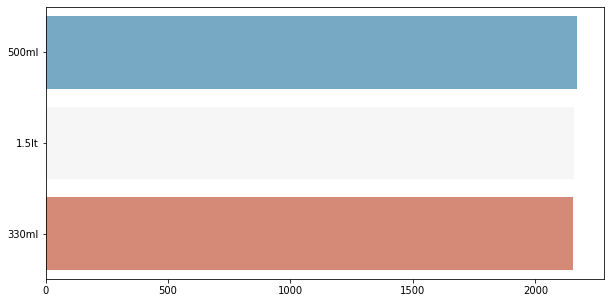

In [7]:
#Build frequency chart for histogram

f, ax = plt.subplots(figsize=(10, 5))
x = pd.DataFrame(df.capacity.value_counts())
print(x)
names = list(x.index)
values = list(x.capacity)
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='teal'>Region Levels Plot</font>**

By reviewing the capacity and container counts plots you should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.**<font color='teal'> Remove the `C` column using the drop function.</font>**

In [8]:
#Here axis tell that if we are going to drop values from rows or columns. 0 signify rows and 1 signify column
df_1 = df.drop('container', axis = 1)
df_1.columns

Index(['date', 'city', 'lat', 'long', 'pop', 'shop', 'brand', 'capacity',
       'price', 'quantity', 'capacity_in_ml', 'Per_capita_comsumption'],
      dtype='object')

## Anamolies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

Hint: you'll see the methodology here in this article on Exploratory Data Analysis [here](nce-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

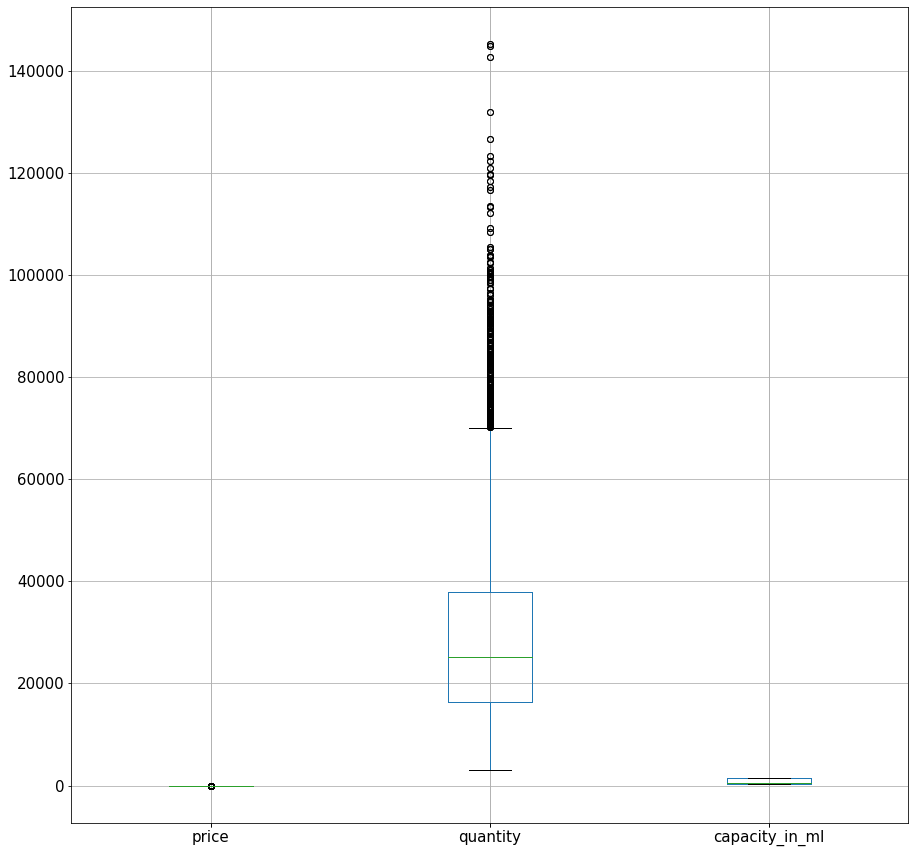

In [9]:
#Importance of Box Plot
#Difference between Outliers and Expected outliers
#Boxplot for one column
#Boxplot for more than one column
boxplot = df[["price", 'quantity', 'capacity_in_ml' ]].boxplot(grid=False, vert=True,fontsize=15, figsize=(15,15))
boxplot1 = df[["price", 'quantity', 'capacity_in_ml' ]].boxplot()

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed</font>

Hint: Recall from your statistics prework that a common definition of an outlier is an observation lying more than (1.5 * the Interquartile range) above the third quartile, or more than just that much below the first quartile.

In [10]:
df_se = df.select_dtypes(include=['int' , 'float'])

In [11]:

# Let's get the Interquartile range, or IQR. This is equal to Q3 - Q1. 
# First, let's use the quantile() method to get the first quartile, and store it in a variable called Q1.
# We'll want to plug 0.25 into the quantile method. 
Q1 = df_se.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = df_se.quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3 - Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
#dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

# We now want to make a boxplot of this new dataframe dfno. 
#dfno.loc[:, dfno.dtypes == np.float64].boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [12]:
Q1

lat                           37.979450
long                          22.417610
pop                       141439.750000
price                          0.610000
quantity                   16441.750000
capacity_in_ml               330.000000
Per_capita_comsumption         0.040413
Name: 0.25, dtype: float64

In [13]:
Q3

lat                           39.636890
long                          23.716220
pop                       665871.000000
price                          1.500000
quantity                   37866.000000
capacity_in_ml              1500.000000
Per_capita_comsumption         0.193039
Name: 0.75, dtype: float64

In [14]:

#to check columns having string data
df.select_dtypes(include=[object])

,city,shop,brand,container,capacity
id,,,,,
0.0,Athens,shop_1,kinder-cola,glass,500ml
1.0,Athens,shop_1,kinder-cola,plastic,1.5lt
2.0,Athens,shop_1,kinder-cola,can,330ml
3.0,Athens,shop_1,adult-cola,glass,500ml
4.0,Athens,shop_1,adult-cola,can,330ml
...,...,...,...,...,...
6475.0,Athens,shop_3,orange-power,plastic,1.5lt
6476.0,Larisa,shop_5,orange-power,can,330ml
6477.0,Patra,shop_6,adult-cola,glass,500ml


In [15]:
#We wont able to draw boxplot for string columns


In [16]:
# Print the shapes of our dataframes df and dfno to compare the number of observations in each. 

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

In [17]:
#Explain the use of Coorelation plot
##Role of Correlation in Features selection
corr = df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,lat,long,pop,price,quantity,capacity_in_ml,Per_capita_comsumption
lat,1.000000,-0.730000,0.280000,-0.000000,-0.070000,0.000000,-0.350000
long,-0.730000,1.000000,-0.040000,0.000000,-0.060000,-0.000000,0.030000
pop,0.280000,-0.040000,1.000000,0.000000,-0.210000,0.000000,-0.650000
price,-0.000000,0.000000,0.000000,1.000000,-0.520000,0.770000,-0.350000
quantity,-0.070000,-0.060000,-0.210000,-0.520000,1.000000,-0.290000,0.780000
capacity_in_ml,0.000000,-0.000000,0.000000,0.770000,-0.290000,1.000000,-0.190000
Per_capita_comsumption,-0.350000,0.030000,-0.650000,-0.350000,0.780000,-0.190000,1.000000


When reviewing the Pearson correlation coefficient heatmap, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from multi-collinearity. 